# ML: Supervised algorithm - Ensemble - Binary Classification

## Introduction

A binary classification problem is posed to be solved with ensemble algorithms such as VotingClassifier, StackingClassifier, BaggingClassifier and AdaBoostClassifier. Using as simple predictors or weak learners, SVM, decision tree and logistic regression.

## 1. Import libraries

In [1]:
import numpy as np
import math
np.random.seed(6)
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble._bagging import BaggingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

## 2. Load datasets

As a binary classification problem. Use the function make_moons(). Note that in this case, you are using a training set that is smaller than the test set.

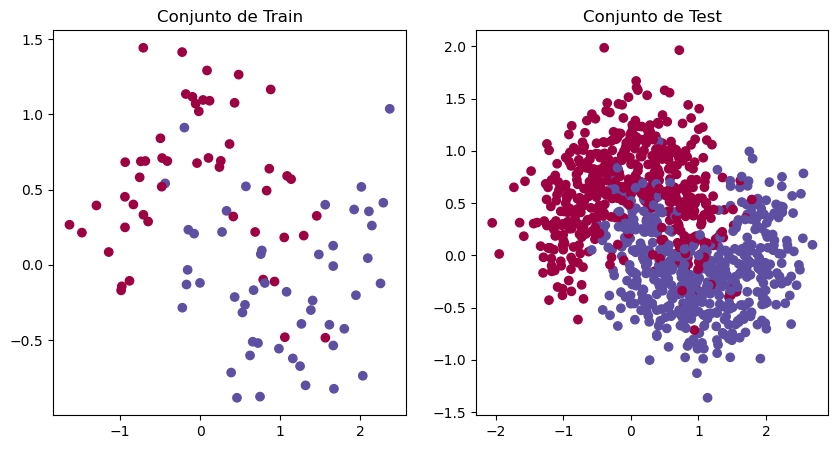

In [2]:
# Dataset generation
np.random.seed(16)
x_train, y_train = make_moons(100, noise=0.3)
x_test, y_test = make_moons(1000, noise=0.3)

# Visualisation
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.Spectral)
axs[0].set_title('Conjunto de Train')
axs[1].scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=plt.cm.Spectral)
axs[1].set_title('Conjunto de Test')
plt.show()

## 3. Train model

As a first approximation, we will consider three simple models. In this case SVM, a decision tree and a logistic regression. These models will serve on the one hand as a basis for the ensemble strategies that we will consider later and on the other hand as a basis for the accuracy of the model.

In [3]:
# Weak learners models
svc = SVC(C=10000, gamma='scale', probability=True)  # Support vector classifier
dt = DecisionTreeClassifier()                        # Decision tree
lr = LogisticRegression()                            # Logistic regressor

# Training
svc.fit(x_train, y_train)
dt.fit(x_train, y_train)
lr.fit(x_train, y_train)

# Predicting
y_pred_svc = svc.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_lr = lr.predict(x_test)


print("Accuracy SVM:", accuracy_score(y_test, y_pred_svc))
print("Accuracy Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_lr))

Accuracy SVM: 0.842
Accuracy Decision Tree: 0.866
Accuracy Logistic Regression: 0.835


### Voting model

Remember that in this strategy, the strength of the model is obtained thanks to the use of simple predictors from different families. In this case we are going to use the 3 algorithms discussed above (SVM, decision tree and logistic regression).

We define the voting structure using the VotingClassifier() function, train and evaluate the results against the test set.

In [4]:
# Voting model
clf_svc = SVC(C=10000, gamma='scale', probability=True)  # Support vector classifier
clf_dt = DecisionTreeClassifier()                        # Decision tree
clf_lr = LogisticRegression()                            # Logistic regressor

# Training
clf_hv = VotingClassifier(estimators=[('lr', clf_svc), ('rf', clf_dt), ('gnb', clf_lr)], voting='hard')
clf_sv = VotingClassifier(estimators=[('lr', clf_svc), ('rf', clf_dt), ('gnb', clf_lr)], voting='soft')

clf_hv.fit(x_train, y_train)
clf_sv.fit(x_train, y_train)

# Predicting
y_pred_hv = clf_hv.predict(x_test)
y_pred_sv = clf_sv.predict(x_test)

print("Hard Voting Accuracy:", accuracy_score(y_test, y_pred_hv))
print("Soft Voting Accuracy:", accuracy_score(y_test, y_pred_sv))

Hard Voting Accuracy: 0.882
Soft Voting Accuracy: 0.875


### Stacking model

Replicating the procedure for Stacking type learning, use our simple predictors but this time, include a model in the output of the simple estimators. 

You can see that in the model definition with the StackingClassifier() function that the model chosen to collect the data and deliver the final prediction is a logistic regression model, where we additionally apply a cross-validation validation technique with 5 parts.

In [5]:
# Stacking model
clf_svc = SVC(C=10000, gamma='scale', probability=True)  # Support vector classifier
clf_dt = DecisionTreeClassifier()                        # Decision tree
clf_lr = LogisticRegression()                            # Logistic regressor

# Training
clf = StackingClassifier(estimators=[('lr', clf_svc), ('rf', clf_dt), ('gnb', clf_lr)],
                         final_estimator=LogisticRegression(),
                         cv=5)

clf.fit(x_train, y_train)

# Predicting
y_pred = clf.predict(x_test)

print("Stacking Accuracy:", accuracy_score(y_test, y_pred))

Stacking Accuracy: 0.883


### Bagging model

For the Bagging strategy, we are going to develop three different models, each with a different set of simple base predictors.

The function that couples the Bagging structure is BaggingClassifier(). In this case, the input parameters are:

* The model to be trained, with all simple predictors having the same hyperparameters.
* Number of estimators or weak learners.
* Proportion of observations to be sampled for training each model.

In [6]:
# Bagging model
clf_svc_bagging = BaggingClassifier(SVC(C=100000, gamma='scale', probability=True), n_estimators=100, max_samples=1.0)
clf_dt_bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=1.0)
clf_lr_bagging = BaggingClassifier(LogisticRegression(C=10000, solver='lbfgs'), n_estimators=100, max_samples=1.0)

# Training
clf_svc_bagging.fit(x_train, y_train)
clf_dt_bagging.fit(x_train, y_train)
clf_lr_bagging.fit(x_train, y_train)

# Predicting
y_pred_svc = clf_svc_bagging.predict(x_test)
y_pred_dt = clf_dt_bagging.predict(x_test)
y_pred_lr = clf_lr_bagging.predict(x_test)

print("Bagging Accuracy with SVM:", accuracy_score(y_test, y_pred_svc))
print("Bagging Accuracy with Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Bagging Accuracy with Logistic Regression:", accuracy_score(y_test, y_pred_lr))

Bagging Accuracy with SVM: 0.878
Bagging Accuracy with Decision Tree: 0.887
Bagging Accuracy with Logistic Regression: 0.842


### Boosting model

Finally, replicate the experiment with a Boosting type algorithm. In this case we have selected Adaboost. 

The function we use to build the Boosting model is Adaboost(), including the simple models as parameters, number of estimators (which can also be seen as the number of iterations) and a parameter associated with the learning rate. 

In [7]:
# Boosting model
clf_svc_boosting = AdaBoostClassifier(SVC(C=100000, gamma='scale', probability=True), n_estimators=100, learning_rate = 0.1)
clf_dt_boosting = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100, learning_rate = 0.1)
clf_lr_boosting = AdaBoostClassifier(LogisticRegression(C=10000, solver='lbfgs'), n_estimators=100, learning_rate = 0.1)

# Training
clf_svc_boosting.fit(x_train, y_train)
clf_dt_boosting.fit(x_train, y_train)
clf_lr_boosting.fit(x_train, y_train)

# Predicting
y_pred_svc = clf_svc_boosting.predict(x_test)
y_pred_dt = clf_dt_boosting.predict(x_test)
y_pred_lr = clf_lr_boosting.predict(x_test)

print("Boosting Accuracy wigh SVC:", accuracy_score(y_test, y_pred_svc))
print("Boosting Accuracy with Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Boosting Accuracy with Logistic Regression:", accuracy_score(y_test, y_pred_lr))

Boosting Accuracy wigh SVC: 0.87
Boosting Accuracy with Decision Tree: 0.872
Boosting Accuracy with Logistic Regression: 0.837


__Please note__:

In general, as you have seen, good predictions are obtained with each of the different strategies. In the case of the Bagging and Boosting methods, consider the results as a base where there is possibly place for improvement by modifying the hyperparameters of the model. 

This is an advantage of the simpler models, where with few parameters in some cases it is possible to obtain competitive metrics. 